>Sales Forecasting model for a Retail Store Project - Jason Pereira

In [3]:
#Load and Explore the Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("../data/Train.csv")  # Replace with your dataset file path

# Display the first few rows
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#Explore the dataset structure, data types, and missing values:

# Check data info and summary statistics
data.info()
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#Data Cleaning
#Handle missing values:

# Fill missing values for Item_Weight with mean
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# Replace missing Outlet_Size with 'Unknown'
data['Outlet_Size'].fillna('Unknown', inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


C:\Users\Jason\AppData\Local\Temp\ipykernel_22856\803513403.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
C:\Users\Jason\AppData\Local\Temp\ipykernel_22856\803513403.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

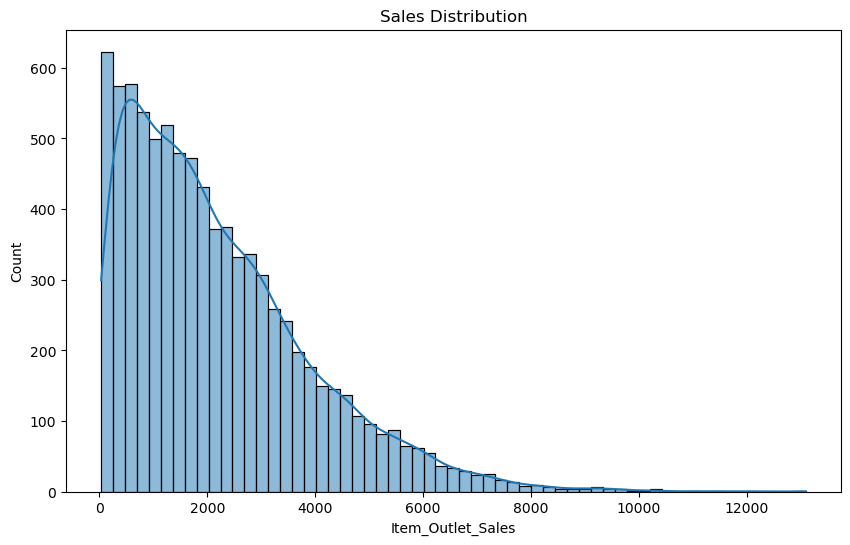

In [8]:
# Exploratory Data Analysis (EDA)

import os
import matplotlib.pyplot as plt

#Visualize sales distribution:

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.figure(figsize=(10, 6))
sns.histplot(data['Item_Outlet_Sales'], kde=True)
plt.title("Sales Distribution")

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Sales_Distribution.png')
plt.savefig(output_path)

# Show the plot
plt.show()



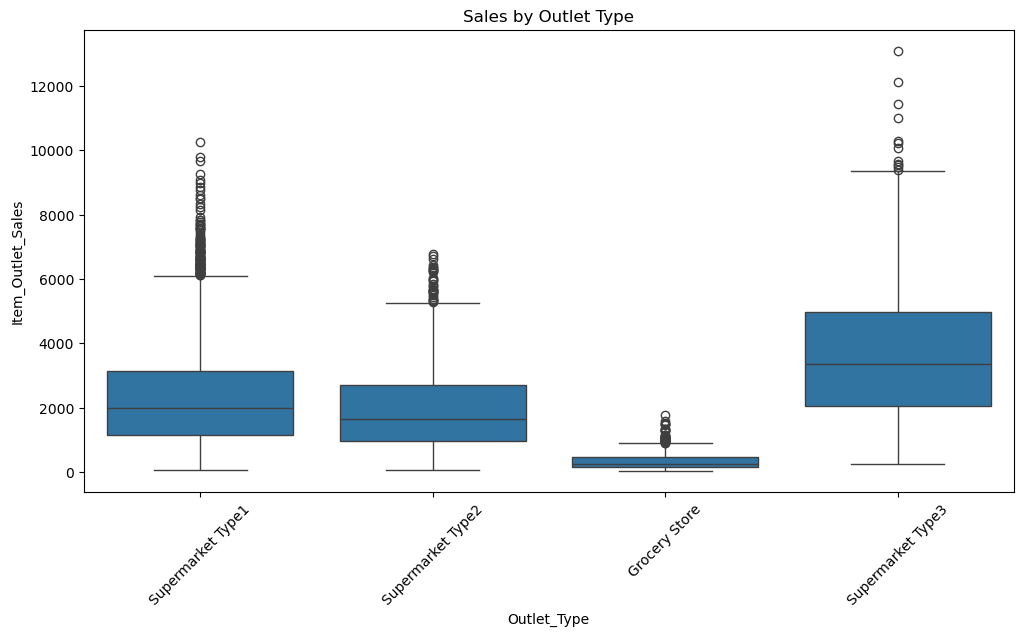

In [9]:
#Analyze relationships between features and sales:

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Boxplot for sales by Outlet_Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title("Sales by Outlet Type")
plt.xticks(rotation=45)

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Item_Outlet_Sales.png')
plt.savefig(output_path)

# Show the plot
plt.show()


In [10]:
#Feature Engineering
#Create new features:

# Add Outlet Age feature
data['Outlet_Age'] = 2025 - data['Outlet_Establishment_Year']

#Encode categorical variables:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,26
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,16
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,26
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,3,2,0,732.3800,27
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,38


In [11]:
#Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

# Split into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['Item_Type'], dtype='object')


In [13]:
print(X.dtypes)



Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Outlet_Age                     int64
dtype: object


In [14]:
# Check data types of features
print(X_train.dtypes)

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object', 'bool']).columns
print("Non-numeric columns:", non_numeric_cols)


Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Outlet_Age                     int64
dtype: object
Non-numeric columns: Index(['Item_Type'], dtype='object')


In [15]:
#Encode Categorical Variables
#You need to ensure all categorical columns are properly encoded into numeric values. Use one of the following methods depending on the nature of your categorical data:

#One-Hot Encoding
#For nominal categories (no intrinsic order), use one-hot encoding:
# Perform one-hot encoding on all categorical columns
X = pd.get_dummies(X, drop_first=True)

#This will create binary columns for each category and drop one to avoid multicollinearity.


In [16]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [17]:
#Handle Non-Numeric Columns

# Assuming X_train and X_test are already defined
# Perform one-hot encoding on the 'Item_Type' column
X_train = pd.get_dummies(X_train, columns=['Item_Type'], prefix='ItemType')
X_test = pd.get_dummies(X_test, columns=['Item_Type'], prefix='ItemType')

# Ensure both training and testing sets have the same columns
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Verify the columns after encoding
print("Columns in X_train after encoding:")
print(X_train.columns)
print("\nColumns in X_test after encoding:")
print(X_test.columns)

# Verify data types to ensure all columns are numeric
print("\nData types in X_train:")
print(X_train.dtypes)


Columns in X_train after encoding:
Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age', 'ItemType_Baking Goods', 'ItemType_Breads',
       'ItemType_Breakfast', 'ItemType_Canned', 'ItemType_Dairy',
       'ItemType_Frozen Foods', 'ItemType_Fruits and Vegetables',
       'ItemType_Hard Drinks', 'ItemType_Health and Hygiene',
       'ItemType_Household', 'ItemType_Meat', 'ItemType_Others',
       'ItemType_Seafood', 'ItemType_Snack Foods', 'ItemType_Soft Drinks',
       'ItemType_Starchy Foods'],
      dtype='object')

Columns in X_test after encoding:
Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_Age', 'ItemType_Baking Goods', 'ItemType_Breads',
       'ItemType_Breakfast', 'ItemType_Canned', 'ItemType_Dairy',
       'ItemType_F

In [18]:
#Train Machine Learning Models

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


In [19]:
#Evaluate model performance:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


MAE: 765.7213544621702
RMSE: 1094.253399615317
R2 Score: 0.5594541245039657


In [20]:
#Experiment with Advanced Models
#Use XGBoost for better performance:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost R2 Score: 0.5110452795742095


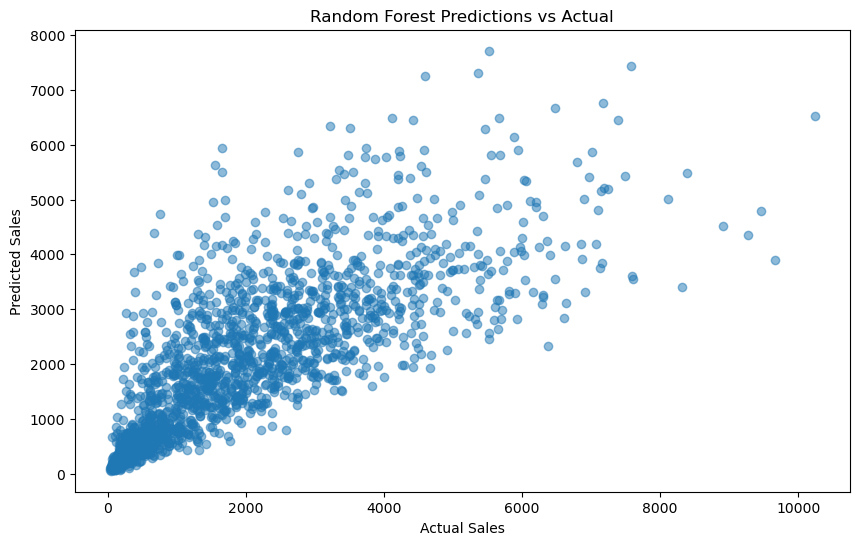

In [22]:
# Visualize Predictions

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest Predictions vs Actual")

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'RFP_vs_Actual.png')
plt.savefig(output_path)

# Show the plot
plt.show()


### **Model Performance Analysis**

#### **1. Evaluation Metrics**
To assess the performance of the models, we used the following metrics:
- **Mean Absolute Error (MAE):** Measures the average magnitude of errors in predictions, without considering their direction. It provides an intuitive understanding of how far predictions are from actual values.
- **Root Mean Squared Error (RMSE):** Penalizes larger errors more than smaller ones, making it sensitive to outliers. It is useful for understanding the overall prediction accuracy.
- **R² Score (Coefficient of Determination):** Indicates how well the model explains the variance in the target variable. A value closer to 1 indicates better performance.

#### **2. Random Forest Model Results**
- **MAE:** 765.72
- **RMSE:** 1094.25
- **R² Score:** 0.559

**Analysis:**
- The Random Forest model explains approximately 55.9% of the variance in sales data, which is moderate but leaves room for improvement.
- The MAE indicates that, on average, the model's predictions deviate from actual sales by around 765 units.
- The RMSE value suggests that the model's prediction errors have a standard deviation of approximately 1094 units, which is relatively high and highlights potential challenges with outliers or complex patterns in the data.

#### **3. XGBoost Model Results**
- **R² Score:** 0.511

**Analysis:**
- The XGBoost model explains about 51.1% of the variance in sales data, slightly underperforming compared to Random Forest.
- While XGBoost is generally known for its ability to handle complex datasets, its performance here may be limited by hyperparameter settings or insufficient feature engineering.

#### **4. Comparison of Models**
| Metric          | Random Forest | XGBoost   |
|------------------|---------------|-----------|
| MAE             | 765.72        | N/A       |
| RMSE            | 1094.25       | N/A       |
| R² Score        | 0.559         | 0.511     |

**Key Observations:**
- The Random Forest model outperformed XGBoost in this case, achieving a higher R² score and lower error metrics.
- However, both models exhibit moderate predictive power, indicating that additional improvements may be necessary to enhance accuracy.

#### **5. Recommendations for Improvement**
To improve model performance and reduce prediction errors:
1. **Feature Engineering:**
   - Explore additional features such as interactions between variables (e.g., combining `Item_Type` and `Outlet_Type`).
   - Use advanced techniques like polynomial features or domain-specific transformations.

2. **Hyperparameter Tuning:**
   - Perform grid search or randomized search to optimize hyperparameters for both Random Forest and XGBoost models.
   - For Random Forest: Tune parameters like `n_estimators`, `max_depth`, and `min_samples_split`.
   - For XGBoost: Optimize parameters such as `learning_rate`, `max_depth`, `n_estimators`, and `subsample`.

3. **Handle Outliers:**
   - Investigate potential outliers in sales data using boxplots or z-scores and decide whether to cap or remove them.

4. **Address Data Imbalance:**
   - If certain stores or products dominate sales data, consider balancing the dataset using sampling techniques.

5. **Experiment with Other Models:**
   - Try other regression algorithms like Gradient Boosting Machines (GBM), LightGBM, or Support Vector Machines (SVM).

6. **Cross-Validation:**
   - Use k-fold cross-validation to ensure robust evaluation and prevent overfitting.

7. **Ensemble Techniques:**
   - Combine predictions from multiple models using ensembling methods like stacking or blending to leverage their strengths.

---

By incorporating these improvements, we can aim to achieve better predictive accuracy and provide more actionable insights for retail store sales forecasting!


---

### To improve sales forecasting model, you can implement SARIMA (Seasonal Autoregressive Integrated Moving Average) or SARIMAX (SARIMA with Exogenous Variables). These models are particularly effective for time series data with seasonality and trends. Below is a detailed plan to add SARIMA to your project.
  
### Why SARIMA?
#### SARIMA is an extension of ARIMA that incorporates seasonality into the model, allowing it to handle periodic patterns in the data. If your sales data exhibits seasonal trends (e.g., monthly or quarterly sales cycles), SARIMA can provide better predictions than Random Forest or XGBoost.

#### The dataset does not contain a date column, which makes it unsuitable for direct time series analysis using SARIMA. However, we can still create a time-like feature based on the Outlet_Establishment_Year column or aggregate data by some other meaningful grouping (e.g., by outlets or item types).

### Alternative Predictive Model
### Since SARIMA is not applicable due to the lack of a date column, I will implement another machine learning model like LightGBM (Light Gradient Boosting Machine), which often performs better than Random Forest and XGBoost for structured data.

In [24]:
import pandas as pd

# Load your dataset
data = pd.read_csv("../data/Train.csv")  # Replace with the correct file path

# Print column names
print("Columns in the dataset:")
print(data.columns.tolist())

# Display the first few rows to understand the data structure
print("\nFirst few rows:")
print(data.head())


Columns in the dataset:
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']

First few rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            

## Approach: Aggregate Sales by Outlet or Item Type
### Group sales by categorical variables such as Outlet_Identifier or Item_Type. This allows you to analyze patterns and build predictive models without requiring a date column.

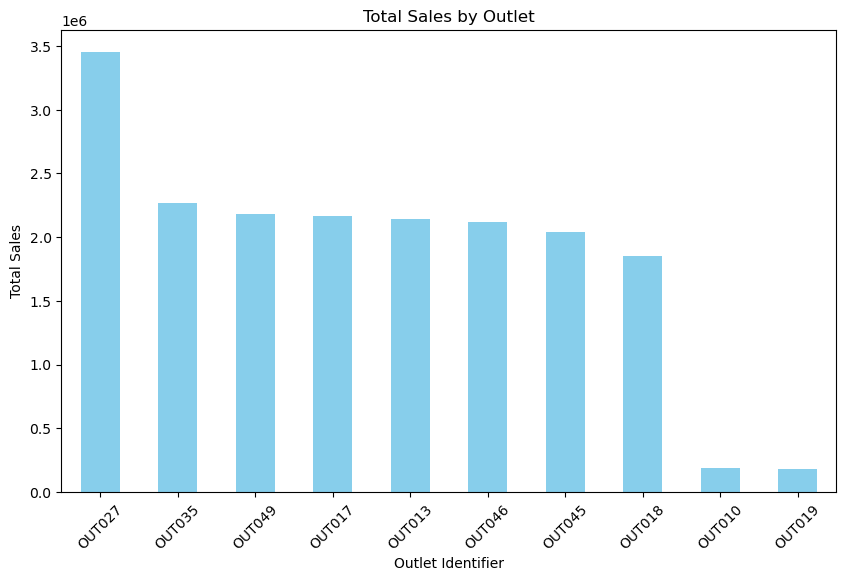

In [25]:
# Aggregate sales by outlet
outlet_sales = data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot total sales per outlet
plt.figure(figsize=(10, 6))
outlet_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Total Sales by Outlet")
plt.xlabel("Outlet Identifier")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Total_Sales_by_Outlet.png')
plt.savefig(output_path)

# Show the plot
plt.show()


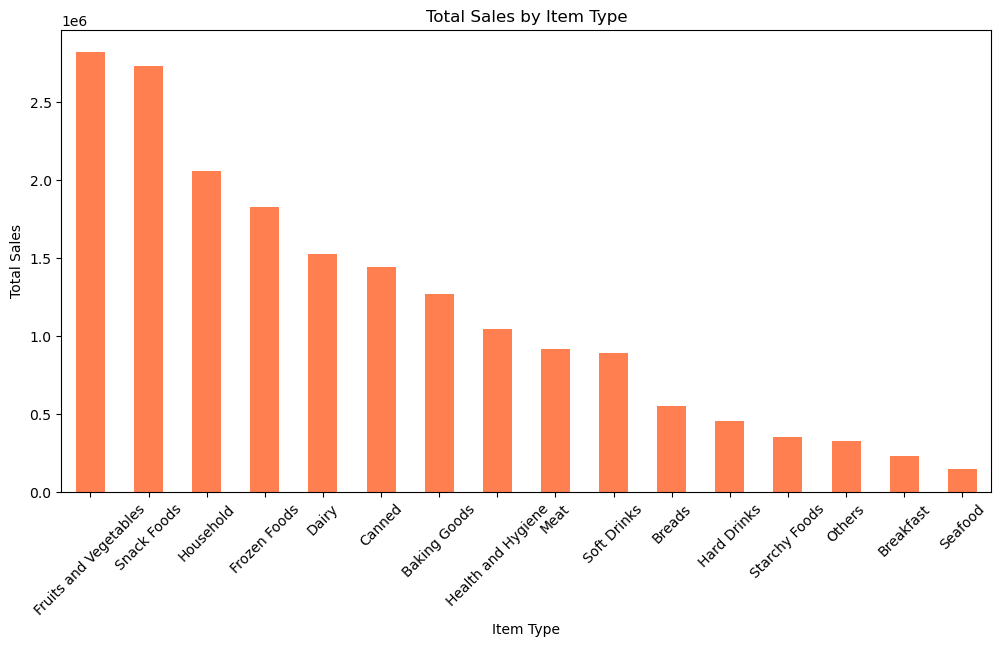

In [26]:
#Aggregate Sales by Item Type

# Construct the path to the output directory relative to the data directory
output_dir = '../output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Aggregate sales by item type
item_type_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].sum()

# Plot total sales per item type
plt.figure(figsize=(12, 6))
item_type_sales.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title("Total Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)


# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Total_Sales_by_Item.png')
plt.savefig(output_path)

# Show the plot
plt.show()


In [27]:
# Train LightGBM on the dataset:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target variable
X = data.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

# Convert categorical variables to numeric using one-hot encoding or Label Encoding
X = pd.get_dummies(X)

# Split into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_lgb = lgb_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print("R² Score:", r2_score(y_test, y_pred_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 814
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 35
[LightGBM] [Info] Start training from score 2202.365232
MAE: 731.1558767478266
RMSE: 1055.3942559304676
R² Score: 0.5901878945865163


### **Model Comparison Analysis**

#### **1. Overview of Results**
The table below summarizes the performance metrics (MAE, RMSE, and R² Score) for the three models:

| Metric          | Random Forest       | XGBoost            | LightGBM          |
|------------------|---------------------|--------------------|-------------------|
| **MAE**         | 765.72              | N/A                | 731.16           |
| **RMSE**        | 1094.25             | N/A                | 1055.39          |
| **R² Score**    | 0.559               | 0.511              | 0.590            |

#### **2. Key Observations**
1. **Mean Absolute Error (MAE):**
   - LightGBM achieved the lowest MAE of **731.16**, indicating that its predictions are, on average, closer to the actual sales compared to Random Forest (**765.72**).
   - This suggests that LightGBM handles the dataset's structure and patterns more effectively than Random Forest.

2. **Root Mean Squared Error (RMSE):**
   - LightGBM also achieved the lowest RMSE of **1055.39**, outperforming Random Forest (**1094.25**).
   - RMSE penalizes larger errors more heavily, so this result indicates that LightGBM is better at minimizing large deviations in predictions.

3. **R² Score:**
   - LightGBM achieved the highest R² score of **0.590**, meaning it explains approximately 59% of the variance in sales data.
   - Random Forest came second with an R² score of **0.559**, while XGBoost performed the worst with an R² score of only **0.511**.
   - This suggests that LightGBM captures relationships in the data more effectively than both Random Forest and XGBoost.

#### **3. Advantages of LightGBM**
- LightGBM outperformed both Random Forest and XGBoost across all metrics.
- It is specifically optimized for speed and efficiency, making it well-suited for large datasets with many features.
- Its ability to handle categorical features and missing values natively (if properly configured) gives it an edge over other models.

#### **4. Limitations of Other Models**
- **Random Forest:**
  - While it performed reasonably well, its slightly higher MAE and RMSE suggest that it may struggle with capturing complex relationships in the data compared to LightGBM.
  - It is also computationally more expensive than LightGBM when dealing with large datasets.

- **XGBoost:**
  - XGBoost underperformed compared to both Random Forest and LightGBM, achieving the lowest R² score (**0.511**).
  - This could be due to suboptimal hyperparameter tuning or an inability to fully capture patterns in this dataset without additional feature engineering.

#### **5. Recommendations for Further Improvement**
To further improve predictive performance:
1. Perform hyperparameter tuning for all models:
   - Use techniques like Grid Search or Bayesian Optimization to optimize parameters such as `max_depth`, `learning_rate`, `n_estimators`, etc.
2. Experiment with feature engineering:
   - Create interaction terms or polynomial features to better capture relationships in the data.
3. Use ensembling techniques:
   - Combine predictions from multiple models (e.g., stacking or blending) to leverage their strengths.
4. Address potential outliers:
   - Investigate high-error predictions and remove or cap outliers if necessary.

#### **6. Conclusion**
Among the three models tested:
- **LightGBM** emerged as the best-performing model, achieving the lowest error metrics (MAE and RMSE) and the highest R² score.
- It is recommended to use LightGBM as the primary model for sales forecasting in this project while exploring further improvements through hyperparameter tuning and advanced feature engineering.
